Neural Netowork to classify Otto Products
#from Kaggle project: https://www.kaggle.com/c/otto-group-product-classification-challenge
#from Jiuzhang



In [1]:
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from __future__ import division

Load data from ./otto_train.csv (excat path may be different)
从./otto_train.csv读入数据

In [2]:
data = pd.read_csv('../input/train.csv')

In [3]:
data

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
5,6,2,1,0,0,7,0,0,0,0,...,0,3,0,0,0,0,2,0,0,Class_1
6,7,2,0,0,0,0,0,0,2,0,...,1,1,0,0,0,0,0,0,1,Class_1
7,8,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Class_1
8,9,0,0,0,0,0,0,0,4,0,...,0,2,0,0,0,0,0,0,1,Class_1
9,10,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,Class_1


In [4]:
data.dtypes
# all features are continuous number, no discrete

id          int64
feat_1      int64
feat_2      int64
feat_3      int64
feat_4      int64
feat_5      int64
feat_6      int64
feat_7      int64
feat_8      int64
feat_9      int64
feat_10     int64
feat_11     int64
feat_12     int64
feat_13     int64
feat_14     int64
feat_15     int64
feat_16     int64
feat_17     int64
feat_18     int64
feat_19     int64
feat_20     int64
feat_21     int64
feat_22     int64
feat_23     int64
feat_24     int64
feat_25     int64
feat_26     int64
feat_27     int64
feat_28     int64
feat_29     int64
            ...  
feat_65     int64
feat_66     int64
feat_67     int64
feat_68     int64
feat_69     int64
feat_70     int64
feat_71     int64
feat_72     int64
feat_73     int64
feat_74     int64
feat_75     int64
feat_76     int64
feat_77     int64
feat_78     int64
feat_79     int64
feat_80     int64
feat_81     int64
feat_82     int64
feat_83     int64
feat_84     int64
feat_85     int64
feat_86     int64
feat_87     int64
feat_88     int64
feat_89   

数据中从第一列到倒数第二列是feature

In [5]:
#data.info alternatively

In [6]:
columns = data.columns[1:-1] # feature column, last column is "label"

In [7]:
X = data[columns]

In [8]:
y = np.ravel(data['target'])

In [9]:
y.shape

(61878,)

Now let's see distribution of each class
观察商品种类的分布

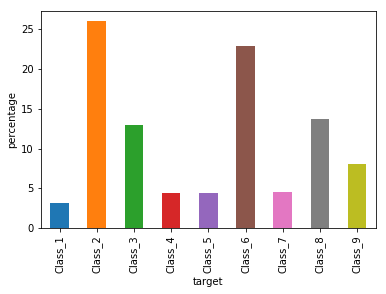

In [10]:
distribution = data.groupby('target').size() / data.shape[0] * 100.0
# this will give you percentage of each class, total would be 100%
distribution.plot(kind='bar')
plt.ylabel('percentage')
plt.show()

显示一个feature在不同类下的分布图

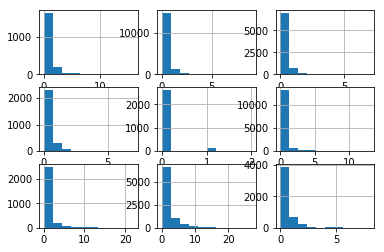

In [11]:
# show how a specific feature distributes in 9 classes
# feature 20
for id in range(9):
    plt.subplot(3, 3, id + 1) # 3行3列
    #plt.axis('off') # 不显示坐标轴
    data[data.target == 'Class_' + str(id + 1)].feat_20.hist()
plt.show()    

显示两个feature的散点图

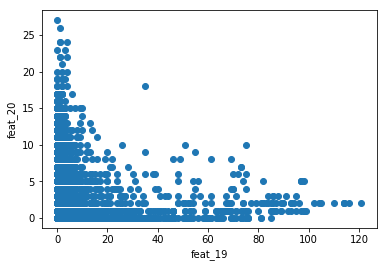

In [12]:
# observe relationship between two features
plt.scatter(data.feat_19, data.feat_20)
plt.xlabel('feat_19')
plt.ylabel('feat_20')
plt.show()
# this means inverse proportional; for proportional, it should be a straightline

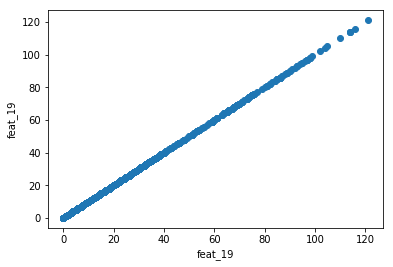

In [13]:
# On contrary, if we were to plot feat_19 again itself...
plt.scatter(data.feat_19, data.feat_19)
plt.xlabel('feat_19')
plt.ylabel('feat_19')
plt.show()

We can show feature-feature correlation matrix
显示所有feature的相关系数矩阵

In [14]:
X.corr()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
feat_1,1.000000,0.031332,-0.027807,-2.752941e-02,0.042973,0.043603,0.298952,0.056321,-0.032285,0.097776,...,0.049634,-0.008739,0.107947,0.089374,0.020830,0.096851,0.010310,0.037264,0.054777,0.081783
feat_2,0.031332,1.000000,0.082573,1.349870e-01,0.020926,0.041343,0.222386,0.019815,-0.025630,0.051925,...,0.009845,-0.006764,-0.039090,0.047451,-0.047035,0.105527,0.515022,0.026383,-0.008219,0.054593
feat_3,-0.027807,0.082573,1.000000,5.835232e-01,0.010880,0.004288,0.001294,-0.053462,-0.063551,0.036944,...,0.011159,-0.048626,-0.096093,-0.009838,-0.082336,0.174781,-0.015068,-0.012417,0.066921,0.006814
feat_4,-0.027529,0.134987,0.583523,1.000000e+00,0.017290,0.014059,0.014490,-0.046184,-0.046250,0.059514,...,0.005684,-0.033153,-0.071029,0.005055,-0.067484,0.183715,0.009454,-0.010312,0.087631,0.015746
feat_5,0.042973,0.020926,0.010880,1.729026e-02,1.000000,0.145355,0.075047,0.035861,-0.024708,0.091324,...,0.467329,0.034062,0.013879,0.013999,-0.019201,0.119951,0.004842,0.012012,0.065331,0.002038
feat_6,0.043603,0.041343,0.004288,1.405895e-02,0.145355,1.000000,0.088014,0.012867,-0.009373,0.041940,...,0.177777,0.004290,0.010455,0.015256,-0.015437,0.035042,0.054034,0.012465,0.015479,0.008521
feat_7,0.298952,0.222386,0.001294,1.448981e-02,0.075047,0.088014,1.000000,0.038121,-0.027146,0.194258,...,0.062634,0.037874,-0.009169,0.089574,-0.033646,0.063511,0.129578,0.068506,-0.032261,0.034912
feat_8,0.056321,0.019815,-0.053462,-4.618407e-02,0.035861,0.012867,0.038121,1.000000,-0.039281,-0.000023,...,0.005064,-0.003416,-0.029395,0.059929,-0.050931,0.007974,0.026807,0.095990,0.013608,0.005131
feat_9,-0.032285,-0.025630,-0.063551,-4.624977e-02,-0.024708,-0.009373,-0.027146,-0.039281,1.000000,-0.024323,...,-0.013569,-0.031462,-0.019144,-0.016925,0.001160,-0.019147,-0.020698,-0.014742,-0.069707,-0.006038
feat_10,0.097776,0.051925,0.036944,5.951396e-02,0.091324,0.041940,0.194258,-0.000023,-0.024323,1.000000,...,0.017939,0.086758,0.159447,0.077421,0.054635,0.061498,0.049908,0.024025,-0.006869,0.041316


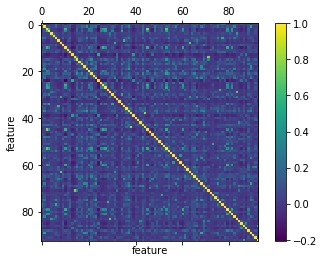

In [15]:
# Let's use visualization to help understand the correlation matrix
# show relationship between all pairs of features
# correlation

fig = plt.figure()
ax = fig.add_subplot(111) # 1 row, 1 col, 1st plot
cax = ax.matshow(X.corr(), interpolation='nearest') # correlation is -1 to 1
fig.colorbar(cax)
plt.xlabel('feature')
plt.ylabel('feature')
plt.show()

In [33]:
num_fea = X.shape[1]

Now initialize neural network, whole net will be 93x30x10x9 
初始化神经网络模型，两个隐藏层，整个网络为93x30x10x9

In [34]:
#alpha is L-2 regularization coefficient
# normally need to iterate on # of nodes, and find the best
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes = (30, 10), random_state = 1, verbose = True)
# structure: 93 x 30 x 10 x 9

Training would normally take 1 minute
训练模型需要约1分钟

In [35]:
model.fit(X, y)
# could have standardize features

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

Check model coefficients and bias
观察模型系数和bias

In [19]:
model.intercepts_

[array([ 9.94082278e-01,  3.86046207e-01,  5.91550391e-01, -4.45770865e-03,
         9.43056298e-01,  8.19841180e-02,  8.62140698e-01,  3.73098972e-02,
         1.09928226e+00,  3.44278822e-01,  6.41464823e-01,  4.88248542e-01,
         5.87297058e-01,  1.08302715e-01,  2.08147538e-01,  4.12768967e-01,
         5.77421470e-01,  5.16763217e-01,  5.79067917e-01,  2.31409003e-01,
         9.06243458e-01,  1.92954190e+00,  9.95369428e-01,  8.51790117e-03,
         2.07355726e-04,  1.23928320e+00,  1.49242242e-02,  5.30460270e-01,
         5.30467189e-01,  5.54281907e-01]),
 array([ 1.56661507,  1.01388152,  0.88929464, -0.14348622,  0.17436041,
         0.48199046,  1.20139668,  0.49232727,  0.47853096,  1.08552819]),
 array([-0.17455654,  1.04199956,  0.37676466, -1.4098096 ,  0.06130975,
        -0.17233491,  1.43091205,  0.84270284, -1.49848526])]

In [20]:
print(model.coefs_[0].shape)
print(model.coefs_[1].shape)
print(model.coefs_[2].shape)

(93, 30)
(30, 10)
(10, 9)


In [21]:
pred = model.predict(X)
pred

array(['Class_6', 'Class_8', 'Class_1', ..., 'Class_9', 'Class_9',
       'Class_9'], dtype='<U7')

Print accuracy score of the model
输出训练数据上的准确度

In [22]:
model.score(X, y)

0.8027570380425999

In [23]:
# alternatively, calculate in the following way
sum(pred == y) / len(y)

0.8027570380425999

In [24]:
y

array(['Class_1', 'Class_1', 'Class_1', ..., 'Class_9', 'Class_9',
       'Class_9'], dtype=object)

In [25]:
pred

array(['Class_6', 'Class_8', 'Class_1', ..., 'Class_9', 'Class_9',
       'Class_9'], dtype='<U7')

In [26]:
len(y)

61878

In [27]:
sum(pred == y)

49673

Now let's perform prediction on the test set by loading test set first
在测试数据上进行预测

In [28]:
test_data = pd.read_csv('../input/test.csv')
Xtest = test_data[test_data.columns[1:]]
Xtest

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0
5,0,0,0,0,0,0,0,0,17,0,...,0,0,1,1,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,5,...,0,3,0,0,1,0,18,1,0,0
7,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,2,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5,0,0,0,0,0
9,0,0,0,0,0,0,0,0,10,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
test_prob = model.predict_proba(Xtest)

输出为对每一个商品预测出的属于每一种类别的概率，并加入id列，输出到./otto_prediction.tsv里

In [30]:
solution = pd.DataFrame(test_prob, columns=['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'])
solution

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1.025459e-04,1.929156e-01,2.929177e-01,5.073749e-01,9.754979e-05,1.470459e-04,6.382580e-03,1.064116e-05,5.138058e-05
1,6.385613e-07,3.774942e-15,7.680664e-15,8.292894e-08,2.336678e-14,2.795314e-01,1.524297e-07,7.204664e-01,1.392774e-06
2,7.441378e-11,3.075721e-15,2.301766e-15,1.810709e-07,9.211274e-22,9.999994e-01,5.926967e-09,8.962575e-08,3.289089e-07
3,1.808716e-11,7.314930e-01,2.675347e-01,9.722345e-04,3.167435e-09,6.840582e-11,2.628252e-08,9.300055e-13,2.391472e-08
4,3.421069e-02,7.234563e-07,6.640632e-08,2.005796e-08,1.321819e-08,4.231894e-04,1.417265e-05,2.734277e-04,9.650777e-01
5,2.669379e-06,3.945342e-01,5.968028e-01,5.010747e-04,2.003296e-05,6.285443e-04,5.756582e-03,1.647371e-03,1.066780e-04
6,7.843900e-03,8.838642e-06,1.133679e-04,2.007415e-07,1.672344e-04,9.386347e-04,2.175871e-03,9.842540e-01,4.497932e-03
7,2.090103e-05,8.588106e-01,1.049884e-01,3.526794e-02,6.534412e-05,6.744104e-05,5.241346e-04,7.209178e-07,2.545112e-04
8,3.956219e-04,4.096271e-01,4.755684e-01,8.834528e-02,2.988948e-04,5.190516e-04,2.485051e-02,1.615685e-04,2.336315e-04
9,2.088225e-05,4.750141e-01,3.493085e-01,4.046732e-04,7.034483e-03,3.185696e-02,7.553967e-03,1.247534e-01,4.053010e-03


In [31]:
solution['id'] = test_data['id']
cols = solution.columns.tolist()
cols = cols[-1:] + cols[:-1]
solution = solution[cols]

In [32]:
solution.to_csv('./otto_prediction.tsv', index = False)

Note that we won't know accuracy on test set until submitting to this competition

Summary:

1. Neural Network method was used to perform classification on Otto dataset
2. Correlation matrix and visualization were used to see feature-feature correltation
3. Classic neural network achieved ~80% accuracy
4. Training time is as short as 1 min (on a normal computer)
5. In future, feature engineering can be used to determine which features to use
6. In future, hyperparameter tuning will be studied to target higher score

